# MEMORIAL UNIVERSTY OF NEWFOUNDLAND
##  REINFORCEMENT LEARNING SPRING 2024

## ASSIGNMENT ONE

BY:

Adejoke Adeoye 
**202383115**

And 

Cephas Acquah Forson 
**202290967**


##  PART 1 - STATIONARY

Generating the Bandit Problem:
We generate 1000 sets of ten means 𝜇1,…,𝜇10 from a 𝑁(0,1) distribution and store them. We also define a function to simulate the rewards for each arm. Each arm 𝑖 has a reward distribution 𝑁(𝜇𝑖,1).

In [1]:
## Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Bandit Parameters
k = 10  # 10 arms of the bandit
n_problems = 1000  # number of bandit problems

# 1000 sets of 10 means from N(0, 1)
np.random.seed(42)  
bandit_means = np.random.normal(0, 1, (n_problems, k))      

# Function to simulate rewards from each arm
def generate_reward(true_mean):
    return np.random.normal(true_mean, 1)

#  view sample means
bandit_means[0]

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
       -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004])

#### Implementing Greedy with Non-Optimistic Initial Values

In [3]:
# Greedy algorithm with non-optimistic initial values
def greedy_non_optimistic(bandit_means, n_steps=1000):
    # Initial rewards 
    n_problems, k = bandit_means.shape
    action_values = np.zeros((n_problems, k))
    action_counts = np.zeros((n_problems, k))
    rewards = np.zeros((n_problems, n_steps))
    optimal_action_counts = np.zeros((n_problems, n_steps))
    
    # Choosing best rewards
    for step in range(n_steps):
        for problem in range(n_problems):
            if np.random.rand() < 0.1:  # including 10% exploration
                action = np.random.choice(k)
            else:
                action = np.argmax(action_values[problem])
                
            reward = generate_reward(bandit_means[problem][action])
            action_counts[problem][action] += 1
            action_values[problem][action] += (reward - action_values[problem][action]) / action_counts[problem][action]
            
            rewards[problem][step] = reward
            optimal_action_counts[problem][step] = (action == np.argmax(bandit_means[problem]))
    # Averaging the rewards
    avg_rewards = np.mean(rewards, axis=0)
    optimal_action_percentage = np.mean(optimal_action_counts, axis=0) * 100
    return avg_rewards, optimal_action_percentage

# non-optimistic initial values and  first 10 time steps
greedy_avg_rewards, greedy_optimal_action_percentage = greedy_non_optimistic(bandit_means)
greedy_avg_rewards[:10], greedy_optimal_action_percentage[:10]  

(array([-0.0326403 ,  0.27725321,  0.33998014,  0.50014415,  0.5889361 ,
         0.60014236,  0.75036386,  0.71987707,  0.80067486,  0.7896569 ]),
 array([ 9.8, 13.1, 15.2, 18.1, 19.4, 21.9, 23.5, 25. , 26.1, 27.2]))

#### Epsilon-Greedy Algorithm

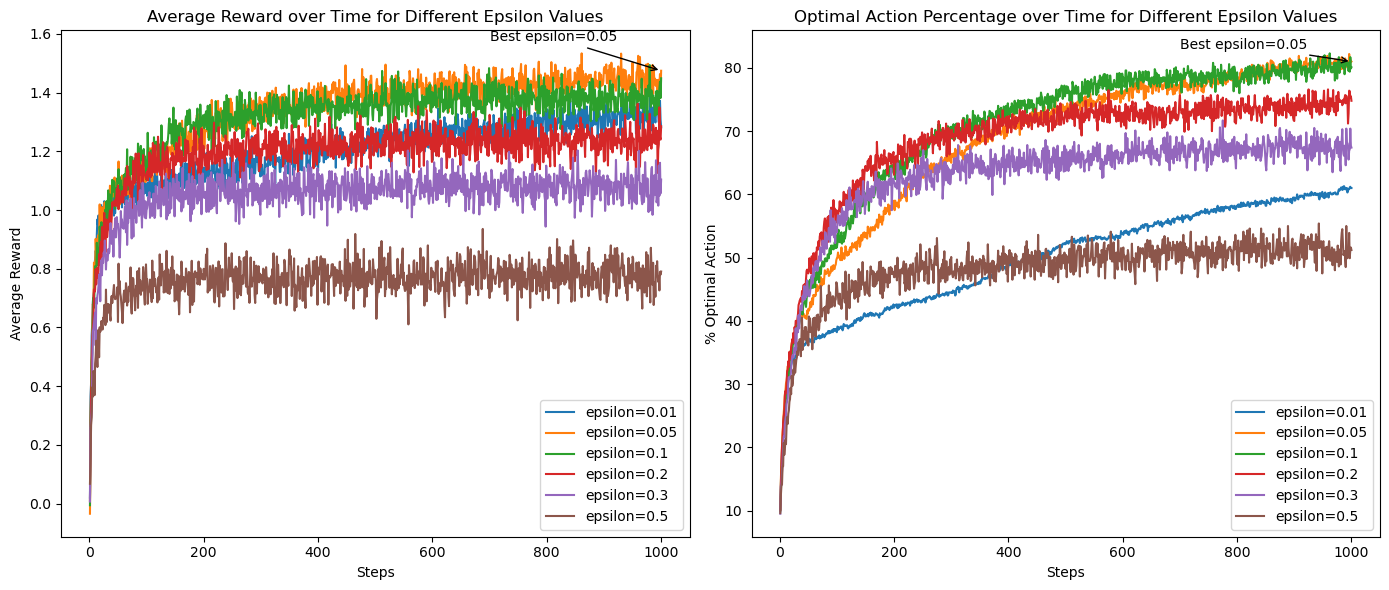

Best epsilon: 0.05
Average rewards for the first 10 steps: [-0.03468546  0.20611432  0.43476074  0.51148155  0.56957441  0.67990779
  0.67057295  0.82076318  0.80546372  0.80053719]
Optimal action percentage for the first 10 steps: [10.1 14.8 17.5 20.2 22.4 23.3 25.4 26.6 28.4 28.8]


In [4]:
# Epsilon-greedy algorithm
def epsilon_greedy(bandit_means, epsilon=0.1, n_steps=1000):
    # Initial rewards 
    n_problems, k = bandit_means.shape
    action_values = np.zeros((n_problems, k))
    action_counts = np.zeros((n_problems, k))
    rewards = np.zeros((n_problems, n_steps))
    optimal_action_counts = np.zeros((n_problems, n_steps))
    
    # Choosing best rewards
    for step in range(n_steps):
        for problem in range(n_problems):
            if np.random.rand() < epsilon:
                action = np.random.choice(k)
            else:
                action = np.argmax(action_values[problem])
                
            reward = generate_reward(bandit_means[problem][action])
            action_counts[problem][action] += 1
            action_values[problem][action] += (reward - action_values[problem][action]) / action_counts[problem][action]
            
            rewards[problem][step] = reward
            optimal_action_counts[problem][step] = (action == np.argmax(bandit_means[problem]))

    # Averaging the rewards
    avg_rewards = np.mean(rewards, axis=0)
    optimal_action_percentage = np.mean(optimal_action_counts, axis=0) * 100
    return avg_rewards, optimal_action_percentage

# Function to find the best epsilon
def find_best_epsilon(bandit_means, epsilons, n_steps=1000):
    best_epsilon = None         # Initial values set to none
    best_avg_reward = -np.inf
    best_avg_rewards = None
    best_optimal_action_percentage = None
    
    epsilon_rewards = []
    epsilon_optimal_action_percentages = []
    
    # Tracking and updating the rewards
    for epsilon in epsilons:
        avg_rewards, optimal_action_percentage = epsilon_greedy(bandit_means, epsilon, n_steps)
        mean_avg_reward = np.mean(avg_rewards)
        
        epsilon_rewards.append(avg_rewards)
        epsilon_optimal_action_percentages.append(optimal_action_percentage)
        
        if mean_avg_reward > best_avg_reward:
            best_avg_reward = mean_avg_reward
            best_epsilon = epsilon
            best_avg_rewards = avg_rewards
            best_optimal_action_percentage = optimal_action_percentage
            
    return best_epsilon, best_avg_rewards, best_optimal_action_percentage, epsilon_rewards, epsilon_optimal_action_percentages

# Range of epsilon values to test (Chosen randomly)
epsilons = [0.01, 0.05, 0.1, 0.2, 0.3, 0.5]

#  the best epsilon
best_epsilon, best_avg_rewards, best_optimal_action_percentage, epsilon_rewards, epsilon_optimal_action_percentages = find_best_epsilon(bandit_means, epsilons)

#   Plots
time_steps = np.arange(1, 1001)
plt.figure(figsize=(14, 6))

# Plotting average rewards
plt.subplot(1, 2, 1)
for i, epsilon in enumerate(epsilons):
    plt.plot(time_steps, epsilon_rewards[i], label=f'epsilon={epsilon}')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Average Reward over Time for Different Epsilon Values')
plt.legend()

#  annotating the best curve
best_avg_rewards_idx = epsilons.index(best_epsilon)
best_avg_rewards_curve = epsilon_rewards[best_avg_rewards_idx]
plt.annotate(f'Best epsilon={best_epsilon}', xy=(1000, best_avg_rewards_curve[-1]), 
             xytext=(700, best_avg_rewards_curve[-1] + 0.1),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

#  optimal action percentage plot
plt.subplot(1, 2, 2)
for i, epsilon in enumerate(epsilons):
    plt.plot(time_steps, epsilon_optimal_action_percentages[i], label=f'epsilon={epsilon}')
plt.xlabel('Steps')
plt.ylabel('% Optimal Action')
plt.title('Optimal Action Percentage over Time for Different Epsilon Values')
plt.legend()

#  annotating the best curve
best_optimal_action_curve = epsilon_optimal_action_percentages[best_avg_rewards_idx]
plt.annotate(f'Best epsilon={best_epsilon}', xy=(1000, best_optimal_action_curve[-1]), 
             xytext=(700, best_optimal_action_curve[-1] + 2),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.tight_layout()
plt.show()

# for the first 10 time steps:
print(f"Best epsilon: {best_epsilon}")
print("Average rewards for the first 10 steps:", best_avg_rewards[:10])
print("Optimal action percentage for the first 10 steps:", best_optimal_action_percentage[:10])


#### Optimistic Initial Values with Greedy Approach

In [5]:
# Optimistic initial values with greedy approach
def optimistic_greedy(bandit_means, initial_value=9, n_steps=1000):
    n_problems, k = bandit_means.shape
    action_values = np.full((n_problems, k), initial_value)
    action_counts = np.zeros((n_problems, k))
    rewards = np.zeros((n_problems, n_steps))
    optimal_action_counts = np.zeros((n_problems, n_steps))
    
    # Updating method
    for step in range(n_steps):
        for problem in range(n_problems):
            action = np.argmax(action_values[problem])
                
            reward = generate_reward(bandit_means[problem][action])
            action_counts[problem][action] += 1
            action_values[problem][action] += (reward - action_values[problem][action]) / action_counts[problem][action]
            
            rewards[problem][step] = reward
            optimal_action_counts[problem][step] = (action == np.argmax(bandit_means[problem]))
    
    # Averaging the rewards
    avg_rewards = np.mean(rewards, axis=0)
    optimal_action_percentage = np.mean(optimal_action_counts, axis=0) * 100
    return avg_rewards, optimal_action_percentage

# Run the optimistic initial values with greedy approach
optimistic_avg_rewards, optimistic_optimal_action_percentage = optimistic_greedy(bandit_means)
optimistic_avg_rewards[:10], optimistic_optimal_action_percentage[:10]  # Display the first 10 time steps


(array([ 0.02804611,  0.0502696 , -0.04221533, -0.00762143,  0.01716001,
        -0.06730711, -0.01323437,  0.01201772, -0.01228267,  0.04921968]),
 array([10.2, 10. ,  9.6,  7.7, 10.3, 10.4, 11.5, 11.1,  9.8,  9.4]))

#### Gradient Bandit Algorithm

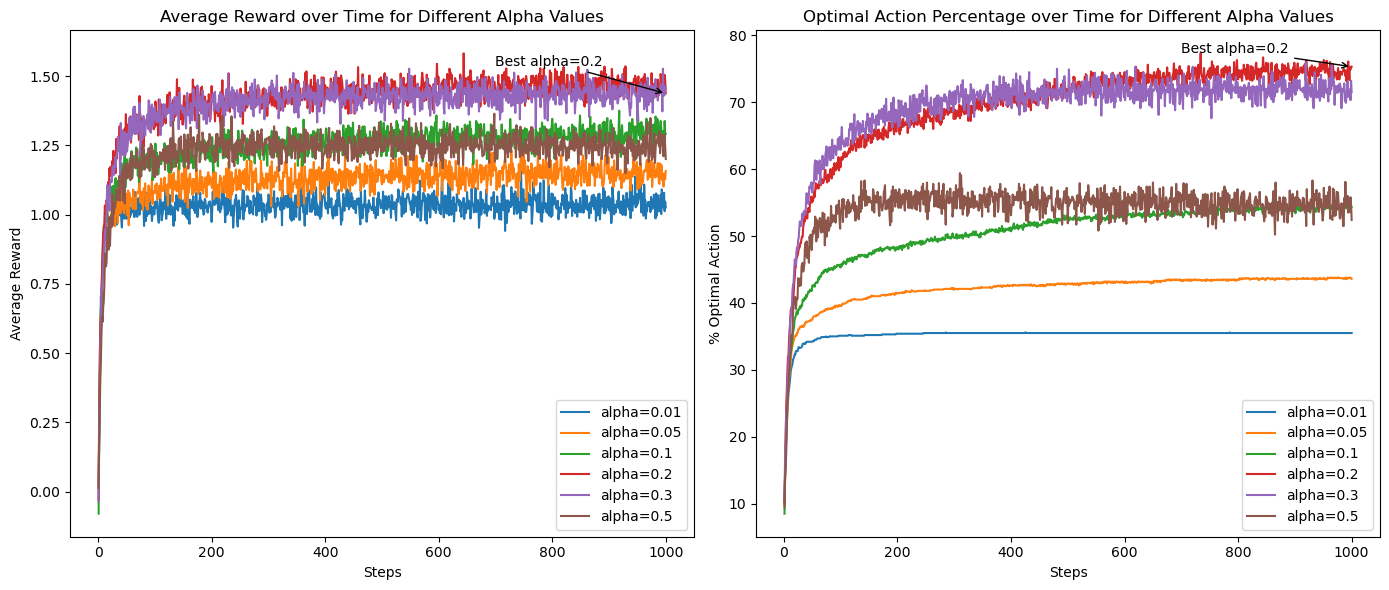

Best alpha: 0.2
Average rewards for the first 10 steps: [-0.02943463  0.27647812  0.45493493  0.60680292  0.64450094  0.72285713
  0.80984394  0.86437418  0.93483318  0.94690738]
Optimal action percentage for the first 10 steps: [10.2 15.2 20.7 24.5 27.  29.5 31.9 32.2 34.6 36. ]


In [6]:
# Gradient Bandit algorithm
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

def softmax_bandit(bandit_means, alpha=0.1, n_steps=1000):
    n_problems, k = bandit_means.shape
    action_values = np.zeros((n_problems, k))
    action_counts = np.zeros((n_problems, k))
    rewards = np.zeros((n_problems, n_steps))
    optimal_action_counts = np.zeros((n_problems, n_steps))
    
    # Update the rewards
    for step in range(n_steps):
        for problem in range(n_problems):
            probabilities = softmax(action_values[problem] / alpha)
            action = np.random.choice(k, p=probabilities)
            
            reward = generate_reward(bandit_means[problem][action])
            action_counts[problem][action] += 1
            action_values[problem][action] += (reward - action_values[problem][action]) / action_counts[problem][action]
            
            rewards[problem][step] = reward
            optimal_action_counts[problem][step] = (action == np.argmax(bandit_means[problem]))
    
    # Averaging the rewards
    avg_rewards = np.mean(rewards, axis=0)
    optimal_action_percentage = np.mean(optimal_action_counts, axis=0) * 100
    return avg_rewards, optimal_action_percentage

# the best alpha
def find_best_alpha(bandit_means, alphas, n_steps=1000):
    best_alpha = None
    best_avg_reward = -np.inf
    best_avg_rewards = None
    best_optimal_action_percentage = None
    
    alpha_rewards = []
    alpha_optimal_action_percentages = []
    
    for alpha in alphas:
        avg_rewards, optimal_action_percentage = softmax_bandit(bandit_means, alpha, n_steps)
        mean_avg_reward = np.mean(avg_rewards)
        
        alpha_rewards.append(avg_rewards)
        alpha_optimal_action_percentages.append(optimal_action_percentage)
        
        if mean_avg_reward > best_avg_reward:
            best_avg_reward = mean_avg_reward
            best_alpha = alpha
            best_avg_rewards = avg_rewards
            best_optimal_action_percentage = optimal_action_percentage
            
    return best_alpha, best_avg_rewards, best_optimal_action_percentage, alpha_rewards, alpha_optimal_action_percentages

# alpha values to test
alphas = [0.01, 0.05, 0.1, 0.2, 0.3, 0.5]

#  the best alpha
best_alpha, best_avg_rewards, best_optimal_action_percentage, alpha_rewards, alpha_optimal_action_percentages = find_best_alpha(bandit_means, alphas)

# Plots
time_steps = np.arange(1, 1001)

plt.figure(figsize=(14, 6))

# Plotting average rewards
plt.subplot(1, 2, 1)
for i, alpha in enumerate(alphas):
    plt.plot(time_steps, alpha_rewards[i], label=f'alpha={alpha}')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Average Reward over Time for Different Alpha Values')
plt.legend()

#  annotating  the best curve
best_avg_rewards_idx = alphas.index(best_alpha)
best_avg_rewards_curve = alpha_rewards[best_avg_rewards_idx]
plt.annotate(f'Best alpha={best_alpha}', xy=(1000, best_avg_rewards_curve[-1]), 
             xytext=(700, best_avg_rewards_curve[-1] + 0.1),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

# Plotting optimal action percentage
plt.subplot(1, 2, 2)
for i, alpha in enumerate(alphas):
    plt.plot(time_steps, alpha_optimal_action_percentages[i], label=f'alpha={alpha}')
plt.xlabel('Steps')
plt.ylabel('% Optimal Action')
plt.title('Optimal Action Percentage over Time for Different Alpha Values')
plt.legend()

#  annotating  the best curve
best_optimal_action_curve = alpha_optimal_action_percentages[best_avg_rewards_idx]
plt.annotate(f'Best alpha={best_alpha}', xy=(1000, best_optimal_action_curve[-1]), 
             xytext=(700, best_optimal_action_curve[-1] + 2),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.tight_layout()
plt.show()

#  first 10 time steps
print(f"Best alpha: {best_alpha}")
print("Average rewards for the first 10 steps:", best_avg_rewards[:10])
print("Optimal action percentage for the first 10 steps:", best_optimal_action_percentage[:10])


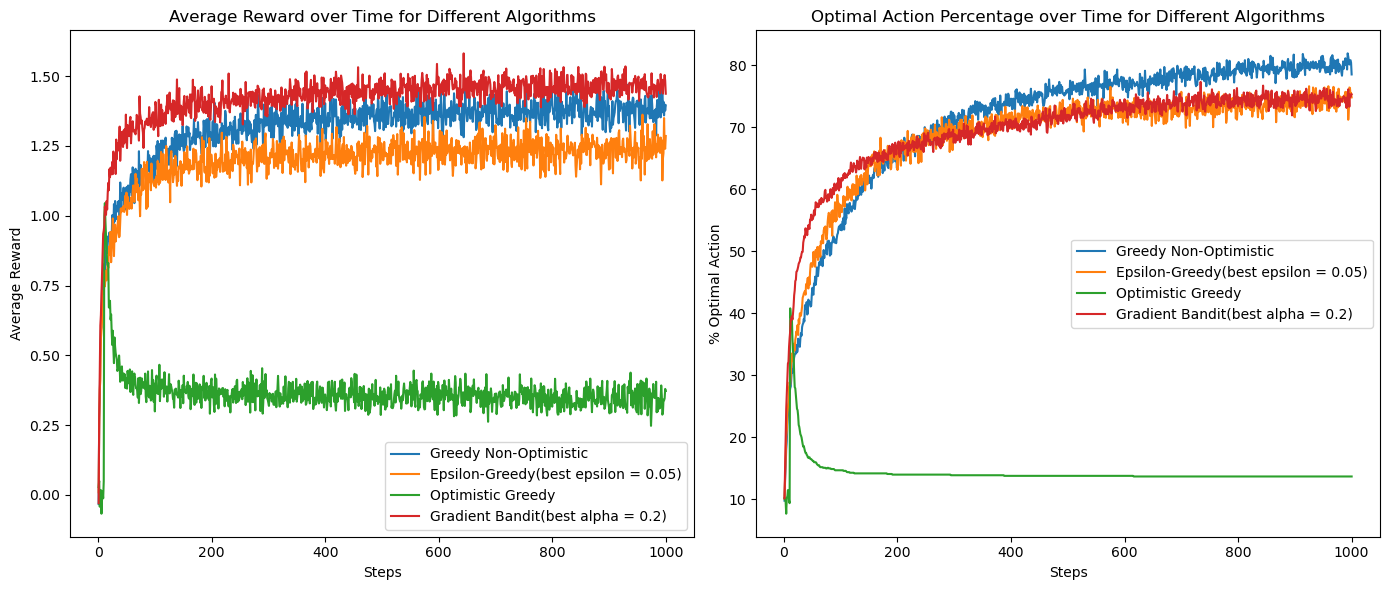

In [7]:
# Plotting the results of all four algorithms
time_steps = np.arange(1, 1001)

plt.figure(figsize=(14, 6))

# Plotting average rewards
plt.subplot(1, 2, 1)
plt.plot(time_steps, greedy_avg_rewards, label='Greedy Non-Optimistic')
plt.plot(time_steps, epsilon_rewards[best_avg_rewards_idx], label='Epsilon-Greedy(best epsilon = 0.05)')
plt.plot(time_steps, optimistic_avg_rewards, label='Optimistic Greedy')
plt.plot(time_steps, alpha_rewards[best_avg_rewards_idx], label= 'Gradient Bandit(best alpha = 0.2)')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Average Reward over Time for Different Algorithms')
plt.legend()

# Plotting optimal action percentage
plt.subplot(1, 2, 2)
plt.plot(time_steps, greedy_optimal_action_percentage, label='Greedy Non-Optimistic')
plt.plot(time_steps, epsilon_optimal_action_percentages[best_avg_rewards_idx], label='Epsilon-Greedy(best epsilon = 0.05)')
plt.plot(time_steps, optimistic_optimal_action_percentage, label='Optimistic Greedy')
plt.plot(time_steps, alpha_optimal_action_percentages[best_avg_rewards_idx], label='Gradient Bandit(best alpha = 0.2)')
plt.xlabel('Steps')
plt.ylabel('% Optimal Action')
plt.title('Optimal Action Percentage over Time for Different Algorithms')
plt.legend()

plt.tight_layout()
plt.show()


# PART 2: NON STATIONARY REWARDS

In real-world scenarios, the reward distributions in multi-armed bandit problems are often non-stationary. This means that the expected rewards can change over time due to gradual shifts or abrupt changes. This part of the experiment extends the analysis to include these non-stationary conditions, specifically:

a.  Gradual changes using drift and mean-reverting processes.
b.  Abrupt changes via random permutation of reward means.

Gradual Changes

Drift Change: The mean reward of each arm at time tt is given by μt=μt−1+ϵt, where ϵtϵt​ is drawn from N(0,0.0012).

Mean-Reverting Change: The mean reward of each arm at time t follows μt=κμt−1+ϵt​, where κ=0.5 and ϵtϵt​ is drawn from N(0,0.012).

Abrupt Changes: At each time step, with a probability of 0.005, the means of the reward distributions are permuted.


In [8]:
# Bandit problem setup with non-stationary rewards
class NonStationaryBandit:
    def __init__(self, k=10, change_type='drift'):
        self.k = k
        self.means = np.random.normal(0, 1, k)
        self.change_type = change_type
        
    # the non-stationary rewards
    def update_means(self):
        if self.change_type == 'drift':
            self.means += np.random.normal(0, 0.001, self.k)
        elif self.change_type == 'mean_reverting':
            self.means = 0.5 * self.means + np.random.normal(0, 0.01, self.k)
        elif self.change_type == 'abrupt':
            if np.random.rand() < 0.005:
                np.random.shuffle(self.means)

    def pull(self, action):
        return np.random.normal(self.means[action], 1)


In [9]:
# Algorithms
class Greedy:       
    def __init__(self, k=10):
        self.k = k
        self.q = np.zeros(k)
        self.n = np.zeros(k)
    
    
    def select_action(self):
        return np.argmax(self.q)
    
    def update(self, action, reward):
        self.n[action] += 1
        self.q[action] += (reward - self.q[action]) / self.n[action]

class EpsilonGreedy:
    def __init__(self, k=10, epsilon=0.1):
        self.k = k
        self.q = np.zeros(k)
        self.n = np.zeros(k)
        self.epsilon = epsilon
    
    def select_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.k)
        else:
            return np.argmax(self.q)
    
    def update(self, action, reward):
        self.n[action] += 1
        self.q[action] += (reward - self.q[action]) / self.n[action]

class OptimisticGreedy:
    def __init__(self, k=10, initial_value=5):
        self.k = k
        self.q = np.ones(k) * initial_value
        self.n = np.zeros(k)
    
    def select_action(self):
        return np.argmax(self.q)
    
    def update(self, action, reward):
        self.n[action] += 1
        self.q[action] += (reward - self.q[action]) / self.n[action]

class GradientBandit:
    def __init__(self, k=10, alpha=0.1):
        self.k = k
        self.h = np.zeros(k)
        self.preferences = np.ones(k) / k
        self.alpha = alpha
        self.avg_reward = 0
        self.time = 0
    
    def select_action(self):
        exp_preferences = np.exp(self.h)
        self.preferences = exp_preferences / np.sum(exp_preferences)
        return np.random.choice(self.k, p=self.preferences)
    
    def update(self, action, reward):
        self.time += 1
        self.avg_reward += (reward - self.avg_reward) / self.time
        for a in range(self.k):
            if a == action:
                self.h[a] += self.alpha * (reward - self.avg_reward) * (1 - self.preferences[a])
            else:
                self.h[a] -= self.alpha * (reward - self.avg_reward) * self.preferences[a]


In [10]:
# Update the simulation function to handle non-stationary bandits
def simulate_non_stationary(bandit, algorithm, steps=1000):
    rewards = np.zeros(steps)
    optimal_actions = np.zeros(steps)

    for step in range(steps):
        action = algorithm.select_action()  # Action selected
        reward = bandit.pull(action)        # Reward earned
        algorithm.update(action, reward)
        rewards[step] = reward
        if action == np.argmax(bandit.means):
            optimal_actions[step] = 1
        bandit.update_means()                # update the bandits
    return rewards, optimal_actions


In [11]:
# Run simulations for non-stationary environments
def run_experiment_non_stationary(change_type, steps=1000, trials=1000, epsilon=0.1, alpha=0.1):
    #   initializations
    greedy_rewards = np.zeros(steps)
    greedy_optimal = np.zeros(steps)
    
    epsilon_greedy_rewards = np.zeros(steps)
    epsilon_greedy_optimal = np.zeros(steps)
    
    optimistic_greedy_rewards = np.zeros(steps)
    optimistic_greedy_optimal = np.zeros(steps)
    
    gradient_bandit_rewards = np.zeros(steps)
    gradient_bandit_optimal = np.zeros(steps)
    # updates
    for _ in range(trials):
        bandit = NonStationaryBandit(change_type=change_type)
        
        greedy_algo = Greedy()
        eps_greedy_algo = EpsilonGreedy(epsilon=epsilon)
        opt_greedy_algo = OptimisticGreedy()
        grad_bandit_algo = GradientBandit(alpha=alpha)
        
        greedy_r, greedy_o = simulate_non_stationary(bandit, greedy_algo, steps)
        epsilon_greedy_r, epsilon_greedy_o = simulate_non_stationary(bandit, eps_greedy_algo, steps)
        optimistic_greedy_r, optimistic_greedy_o = simulate_non_stationary(bandit, opt_greedy_algo, steps)
        gradient_bandit_r, gradient_bandit_o = simulate_non_stationary(bandit, grad_bandit_algo, steps)
        
        greedy_rewards += greedy_r
        greedy_optimal += greedy_o
        
        epsilon_greedy_rewards += epsilon_greedy_r
        epsilon_greedy_optimal += epsilon_greedy_o
        
        optimistic_greedy_rewards += optimistic_greedy_r
        optimistic_greedy_optimal += optimistic_greedy_o
        
        gradient_bandit_rewards += gradient_bandit_r
        gradient_bandit_optimal += gradient_bandit_o
    
    # Averaging the results over trials
    greedy_rewards /= trials
    greedy_optimal /= trials
    
    epsilon_greedy_rewards /= trials
    epsilon_greedy_optimal /= trials
    
    optimistic_greedy_rewards /= trials
    optimistic_greedy_optimal /= trials
    
    gradient_bandit_rewards /= trials
    gradient_bandit_optimal /= trials
    
    # keep track of all data
    return (greedy_rewards, greedy_optimal,
            epsilon_greedy_rewards, epsilon_greedy_optimal,
            optimistic_greedy_rewards, optimistic_greedy_optimal,
            gradient_bandit_rewards, gradient_bandit_optimal)


In [12]:
# Experiment Parameters
steps = 1000
trials = 1000
epsilon = 0.1
alpha = 0.1

# Running experiments for the 3  non-stationary conditions
gradual_drift_results = run_experiment_non_stationary('drift', steps=steps, trials=trials, epsilon=epsilon, alpha=alpha)
mean_reverting_results = run_experiment_non_stationary('mean_reverting', steps=steps, trials=trials, epsilon=epsilon, alpha=alpha)
abrupt_results = run_experiment_non_stationary('abrupt', steps=steps, trials=trials, epsilon=epsilon, alpha=alpha)

# View the results
gradual_drift_results
mean_reverting_results
abrupt_results


(array([0.0132079 , 0.2520213 , 0.4379951 , 0.54583531, 0.69224245,
        0.74290221, 0.77976631, 0.75399685, 0.80096293, 0.82752098,
        0.83674926, 0.8528601 , 0.88131053, 0.85912188, 0.86739854,
        0.92160774, 0.90923006, 0.95514765, 0.91850496, 0.92702967,
        0.90341857, 0.89955869, 0.92946707, 0.9229603 , 0.9100335 ,
        0.91286415, 0.94711478, 0.93701377, 0.86231729, 0.90423247,
        0.88447084, 0.91254563, 0.9094573 , 0.92513537, 0.94366659,
        0.9460004 , 0.92650975, 0.90601991, 0.89344029, 0.92095185,
        0.88960049, 0.91400386, 0.86588009, 0.9425547 , 0.81423942,
        0.92249961, 0.86955404, 0.83061626, 0.93365122, 0.81437966,
        0.86152147, 0.84874597, 0.93738376, 0.86903368, 0.77547004,
        0.86394312, 0.8568532 , 0.86463794, 0.86510816, 0.94008236,
        0.86124138, 0.89367853, 0.81432709, 0.87109171, 0.81483337,
        0.87297579, 0.8943839 , 0.81603182, 0.86953904, 0.8231697 ,
        0.77762911, 0.80292504, 0.82185523, 0.85

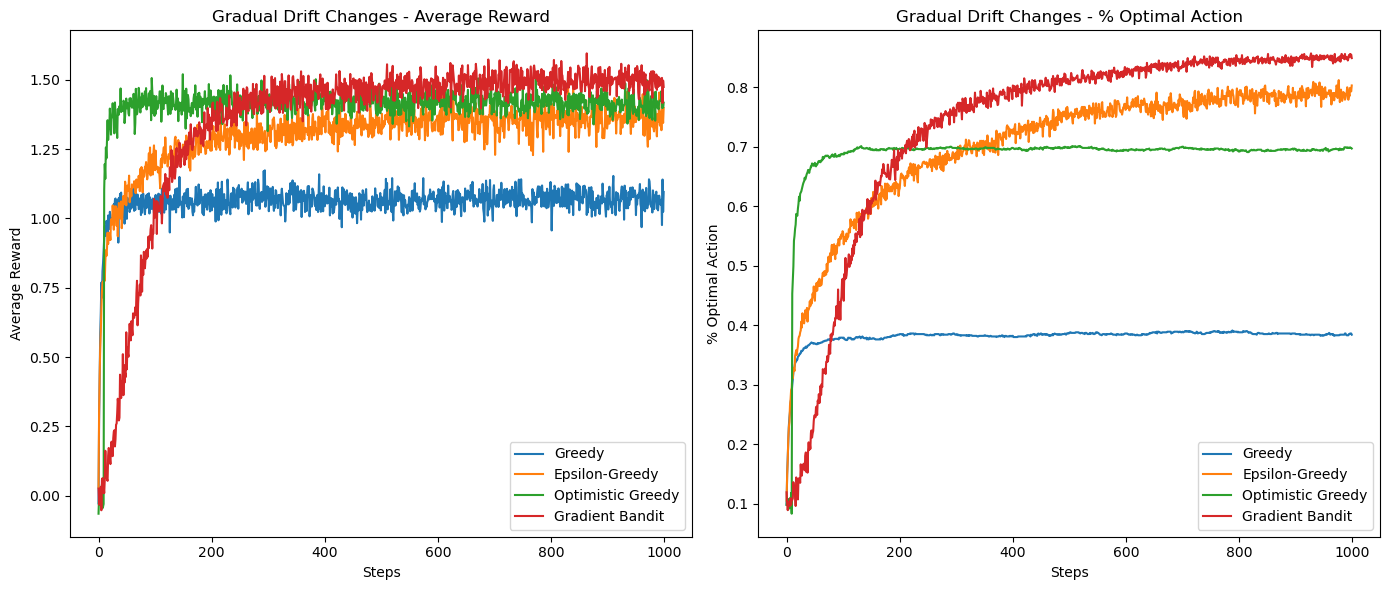

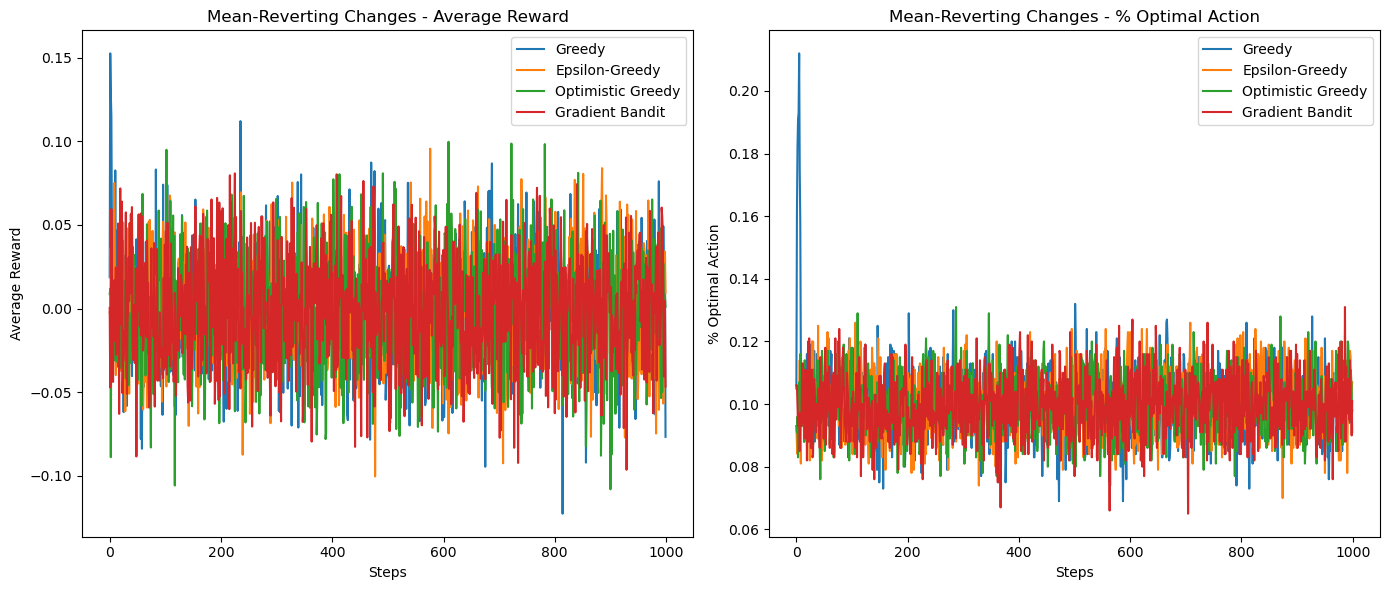

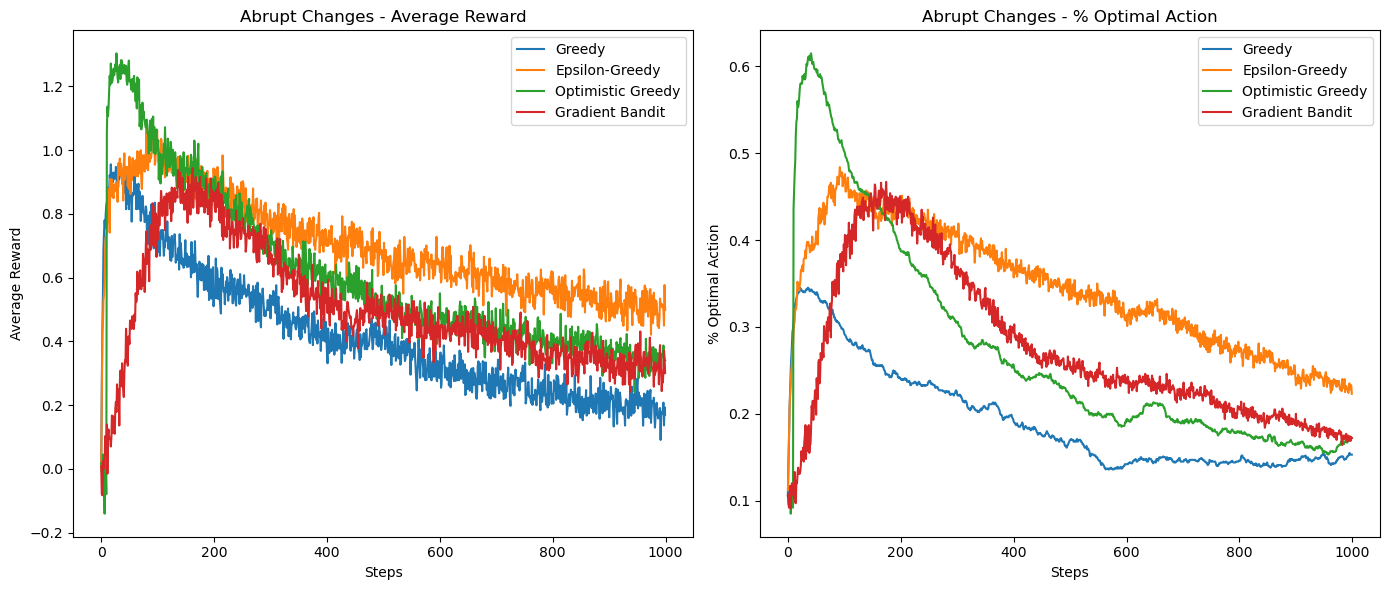

In [13]:
# plot the results
def plot_results(results, title):
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.plot(results[0], label='Greedy')
    plt.plot(results[2], label='Epsilon-Greedy')
    plt.plot(results[4], label='Optimistic Greedy')
    plt.plot(results[6], label='Gradient Bandit')
    plt.xlabel('Steps')
    plt.ylabel('Average Reward')
    plt.legend()
    plt.title(title + ' - Average Reward')
    
    plt.subplot(1, 2, 2)
    plt.plot(results[1], label='Greedy')
    plt.plot(results[3], label='Epsilon-Greedy')
    plt.plot(results[5], label='Optimistic Greedy')
    plt.plot(results[7], label='Gradient Bandit')
    plt.xlabel('Steps')
    plt.ylabel('% Optimal Action')
    plt.legend()
    plt.title(title + ' - % Optimal Action')
    
    plt.tight_layout()
    plt.show()

plot_results(gradual_drift_results, 'Gradual Drift Changes')
plot_results(mean_reverting_results, 'Mean-Reverting Changes')
plot_results(abrupt_results, 'Abrupt Changes')

Box Plots for the Terminal reward distributions

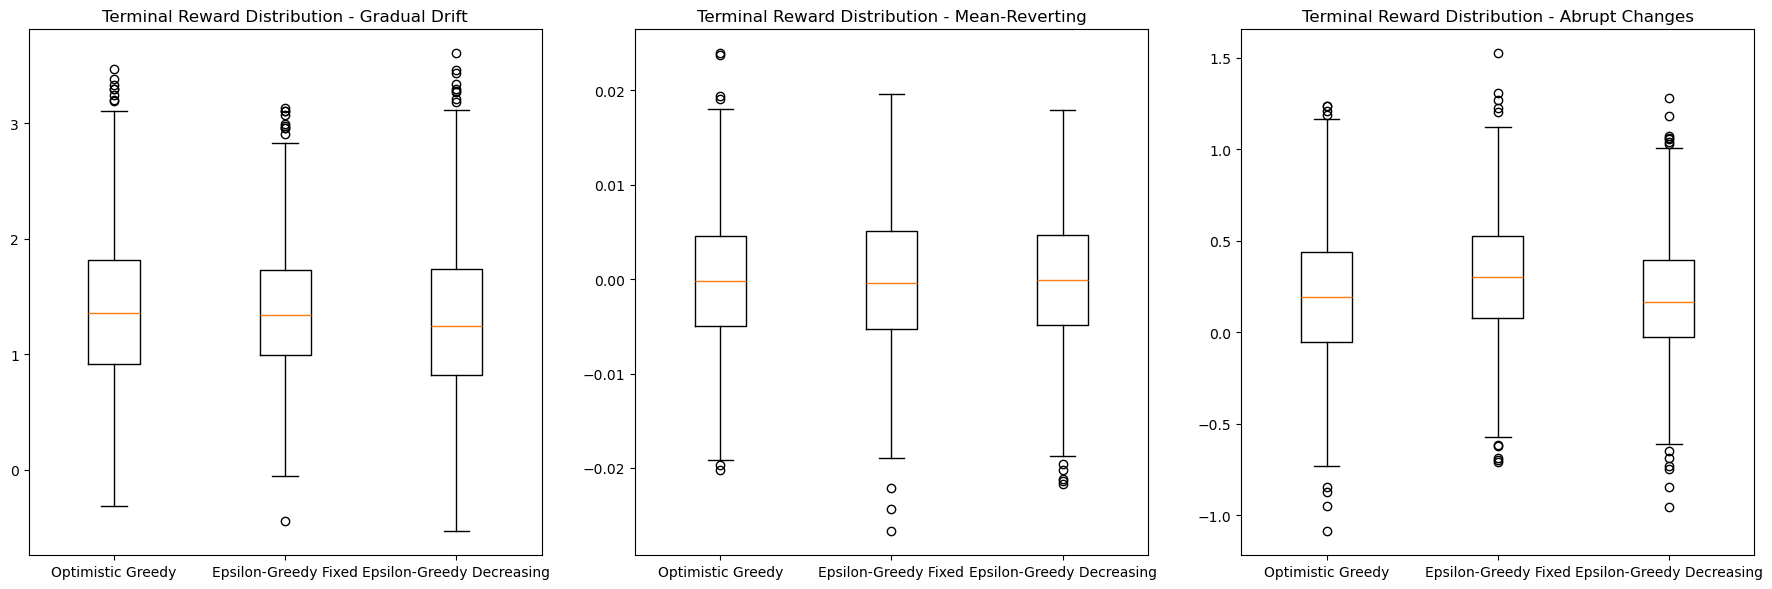

In [14]:
# Caution: Chunk takes a while to run
# setup with non-stationary rewards
class NonStationaryBandit:
    def __init__(self, k=10, change_type='drift'):
        self.k = k
        self.means = np.random.normal(0, 1, k)
        self.change_type = change_type

    def update_means(self):
        if self.change_type == 'drift':
            self.means += np.random.normal(0, 0.001, self.k)
        elif self.change_type == 'mean_reverting':
            self.means = 0.5 * self.means + np.random.normal(0, 0.01, self.k)
        elif self.change_type == 'abrupt':
            if np.random.rand() < 0.005:
                np.random.shuffle(self.means)

    def pull(self, action):
        return np.random.normal(self.means[action], 1)

# Algorithms
class OptimisticGreedy:
    def __init__(self, k=10, initial_value=5):
        self.k = k
        self.q = np.ones(k) * initial_value
        self.n = np.zeros(k)
    
    def select_action(self):
        return np.argmax(self.q)
    
    def update(self, action, reward):
        self.n[action] += 1
        self.q[action] += (reward - self.q[action]) / self.n[action]

class EpsilonGreedyFixed:
    def __init__(self, k=10, epsilon=0.1):
        self.k = k
        self.q = np.zeros(k)
        self.n = np.zeros(k)
        self.epsilon = epsilon
    
    def select_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.k)
        else:
            return np.argmax(self.q)
    
    def update(self, action, reward):
        self.n[action] += 1
        self.q[action] += (reward - self.q[action]) / self.n[action]

class EpsilonGreedyDecreasing:
    def __init__(self, k=10):
        self.k = k
        self.q = np.zeros(k)
        self.n = np.zeros(k)
    
    def select_action(self):
        epsilon = 1 / (np.sum(self.n) + 1)
        if np.random.rand() < epsilon:
            return np.random.randint(self.k)
        else:
            return np.argmax(self.q)
    
    def update(self, action, reward):
        self.n[action] += 1
        self.q[action] += (reward - self.q[action]) / self.n[action]

# Simulations 
def simulate_non_stationary(bandit, algorithm, steps=20000):
    rewards = np.zeros(steps)
    for step in range(steps):
        action = algorithm.select_action()
        reward = bandit.pull(action)
        algorithm.update(action, reward)
        rewards[step] = reward
        bandit.update_means()
    return np.mean(rewards)

# experiments
def run_experiment_non_stationary(change_type, steps=2000, trials=1000, epsilon=0.1):
    optimistic_rewards = []
    epsilon_fixed_rewards = []
    epsilon_decreasing_rewards = []

    for _ in range(trials):
        bandit = NonStationaryBandit(change_type=change_type)
        
        optimistic_algo = OptimisticGreedy()
        epsilon_fixed_algo = EpsilonGreedyFixed(epsilon=epsilon)
        epsilon_decreasing_algo = EpsilonGreedyDecreasing()
        
        optimistic_rewards.append(simulate_non_stationary(bandit, optimistic_algo, steps))
        epsilon_fixed_rewards.append(simulate_non_stationary(bandit, epsilon_fixed_algo, steps))
        epsilon_decreasing_rewards.append(simulate_non_stationary(bandit, epsilon_decreasing_algo, steps))
    
    return optimistic_rewards, epsilon_fixed_rewards, epsilon_decreasing_rewards

# Experiment Parameters
steps = 20000
trials = 1000
epsilon = 0.1

# Running experiments for each non-stationary condition
gradual_drift_results = run_experiment_non_stationary('drift', steps=steps, trials=trials, epsilon=epsilon)
mean_reverting_results = run_experiment_non_stationary('mean_reverting', steps=steps, trials=trials, epsilon=epsilon)
abrupt_results = run_experiment_non_stationary('abrupt', steps=steps, trials=trials, epsilon=epsilon)

# Plotting Results
def plot_results(gradual_results, reverting_results, abrupt_results, title):
    labels = ['Optimistic Greedy', 'Epsilon-Greedy Fixed', 'Epsilon-Greedy Decreasing']
    
    plt.figure(figsize=(18, 6))
    
    plt.subplot(1, 3, 1)
    plt.boxplot(gradual_results)
    plt.xticks([1, 2, 3], labels)
    plt.title(f'{title} - Gradual Drift')
    
    plt.subplot(1, 3, 2)
    plt.boxplot(reverting_results)
    plt.xticks([1, 2, 3], labels)
    plt.title(f'{title} - Mean-Reverting')
    
    plt.subplot(1, 3, 3)
    plt.boxplot(abrupt_results)
    plt.xticks([1, 2, 3], labels)
    plt.title(f'{title} - Abrupt Changes')
    
    plt.tight_layout()
    plt.show()

plot_results(gradual_drift_results, mean_reverting_results, abrupt_results, 'Terminal Reward Distribution')
